In [1]:
##This is an analysis of the IMDB top 1000 broken up by decades from 1960's to present.
#With this analysis, I explore how films have improved from an IMDB rating perspective over 
#the past 60 years.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# Read the data from the imdb top 1000 file
file_path = 'Datasets/imdb_top_1000.csv'
#excluding unnecessary columns
df = pd.read_csv(file_path, usecols=lambda x: x != "Poster_Link")
#Filtering dataset for only films from 1960-present
df = df[df['Released_Year'].astype(int) >= 1960]

In [4]:
#creating a new decade column to partition the data by decade
df['Decade'] = (df['Released_Year'] // 10) * 10

#Calculating the mean rating, and number of films released in each decade
dfdecades = df.groupby('Decade').agg({'IMDB_Rating': 'mean', 'Series_Title': 'count'})
dfdecades = dfdecades.reset_index()
dfdecades.rename(columns = {'IMDB_Rating': 'IMDB Rating AVG', 'Series_Title': 'Number of Films'}, inplace=True)
dfdecades['Decade_Number_of_Films Combined'] = dfdecades['Decade'].astype(str) + ' (' + dfdecades['Number of Films'].astype(str) + ' films)'
print(dfdecades)
#Excluding 2020 as the decade is not complete yet
dfdecadesno2020 = dfdecades[dfdecades['Decade'] != 2020]
print(dfdecadesno2020)

   Decade  IMDB Rating AVG  Number of Films Decade_Number_of_Films Combined
0    1960         7.973973               73                 1960 (73 films)
1    1970         7.969737               76                 1970 (76 films)
2    1980         7.953933               89                 1980 (89 films)
3    1990         7.960927              151                1990 (151 films)
4    2000         7.899578              237                2000 (237 films)
5    2010         7.924380              242                2010 (242 films)
6    2020         8.133333                6                  2020 (6 films)
   Decade  IMDB Rating AVG  Number of Films Decade_Number_of_Films Combined
0    1960         7.973973               73                 1960 (73 films)
1    1970         7.969737               76                 1970 (76 films)
2    1980         7.953933               89                 1980 (89 films)
3    1990         7.960927              151                1990 (151 films)
4    2000   

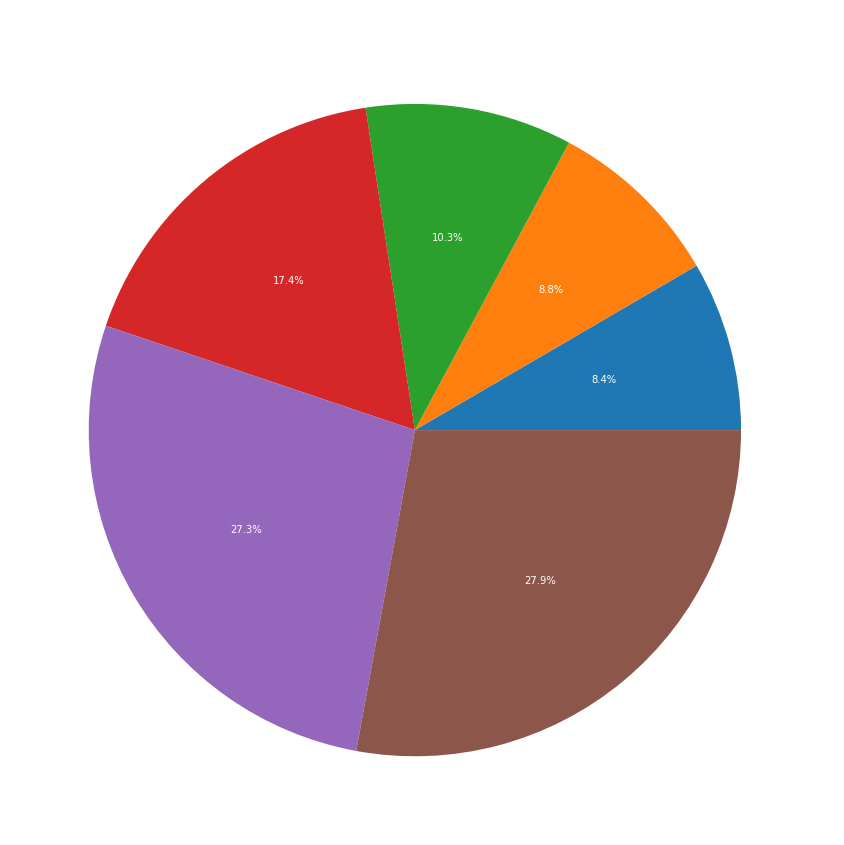

In [5]:
#Excluding 2020 as the decade is not complete yet
dfno2020 = df[df['Decade'] != 2020]
fig, ax = plt.subplots(figsize=(15, 15))

#Pie chart showing the number of films in the IMDB top 1000 for each decade
ax.pie(dfdecadesno2020['Number of Films'], labels=dfdecadesno2020['Decade_Number_of_Films Combined'], autopct='%1.1f%%',textprops={'color':"w"})
ax.set_title('IMDB top 1000 by decade',color='white')

plt.suptitle('')
plt.show()

##The pie chart below tells us that with each decade that has passed, more and more films are 
#being ranked in the top 1000. This could be due to  the increase in films being made and/or 
#the advancements we have made in filmaking that has yielded higher quality films.

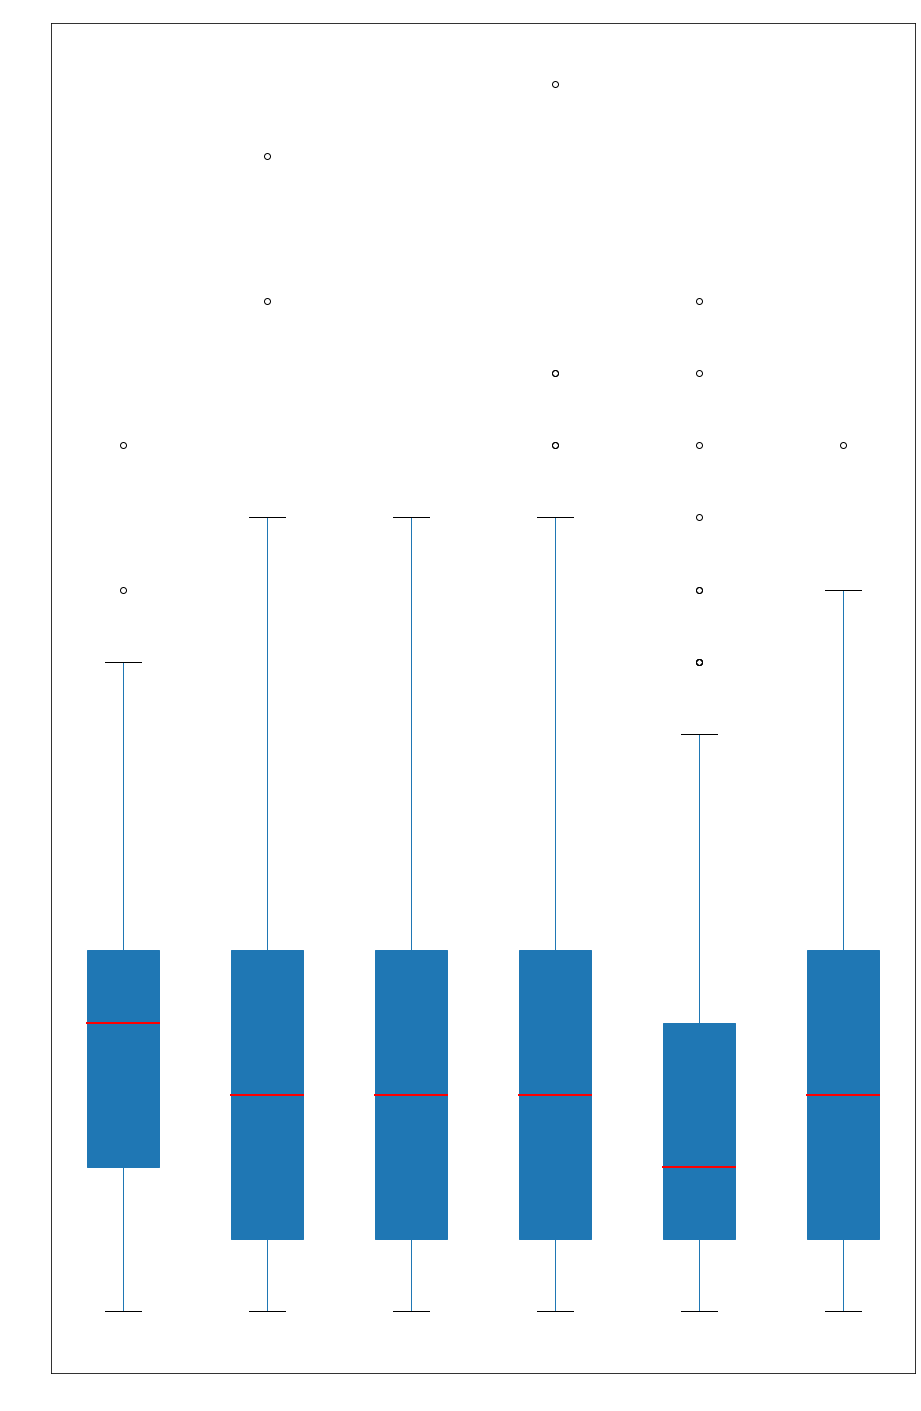

,Decade,IMDB Rating AVG,Number of Films,Decade_Number_of_Films Combined
0,1960,7.973973,73,1960 (73 films)
1,1970,7.969737,76,1970 (76 films)
2,1980,7.953933,89,1980 (89 films)
3,1990,7.960927,151,1990 (151 films)
4,2000,7.899578,237,2000 (237 films)
5,2010,7.924380,242,2010 (242 films)


In [6]:
fig, ax = plt.subplots(figsize=(15, 25))

#Box plot showing IMDB rating data from each decade
bplot = dfno2020.boxplot(column='IMDB_Rating', by='Decade', ax=ax, medianprops={'color': 'red', 'linewidth': 2}, patch_artist=True)

ax.grid(False)

ax.set_ylabel('IMDB Rating', color='white')
ax.set_xlabel('Decade', color='white')

ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')

ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

ax.set_title('IMDB Rating Boxplot by decade', color='white')
plt.suptitle('')
plt.show()

dfdecadesno2020

##The Boxplot below shows that the decade with the least disparity and highest median was 
#the 1960's. 

##Then from 1970-1990, there was a similar disparity and median for all films
#in the top 1000. 

##In 2000, there was a considerable dip in disparity, max, and median. There are a few points
#in the 2000s considered as outliers that are actually within other decade's max whisker, 
#further showing the dip that occurred in the 2000s.

##Starting in 2010, we see that the disparity is back to what it was in decades previous 
#to the 2000s.